In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
model_df=pd.read_csv('./home_credit_data/model_df.csv')

In [3]:
y=model_df['TARGET']
X=model_df[['EXT_SOURCE_1','EXT_SOURCE_3','EXT_SOURCE_2','bureau_DAYS_CREDIT_mean', 'CREDIT_ACTIVE_Closed_count_norm','CREDIT_ACTIVE_Active_count_norm','DAYS_BIRTH','DAYS_BIRTH_GROUP','bureau_DAYS_CREDIT_min','bureau_DAYS_CREDIT_UPDATE_mean','DAYS_EMPLOYED','CREDIT_ACTIVE_Active_count','OWN_CAR_AGE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','BASEMENTAREA_MEDI','LIVINGAREA_AVG','bureau_DAYS_ENDDATE_FACT_min','bureau_DAYS_ENDDATE_FACT_sum','BASEMENTAREA_AVG','bureau_DAYS_CREDIT_ENDDATE_sum','LIVINGAREA_MEDI','BASEMENTAREA_MODE','bureau_DAYS_CREDIT_max','TOTALAREA_MODE','REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3','FLAG_EMP_PHONE','LIVINGAREA_MODE','bureau_DAYS_CREDIT_sum','APARTMENTS_AVG','bureau_DAYS_CREDIT_UPDATE_sum','APARTMENTS_MODE','bureau_DAYS_ENDDATE_FACT_mean','APARTMENTS_MEDI','CREDIT_TYPE_Microloan_count_norm','bureau_DAYS_CREDIT_ENDDATE_mean','REG_CITY_NOT_WORK_CITY','bureau_DAYS_CREDIT_UPDATE_min','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','bureau_DAYS_CREDIT_ENDDATE_min','FLOORSMAX_AVG','CREDIT_TYPE_Credit card_count_norm','AMT_CREDIT','FLOORSMAX_MEDI','CREDIT_TYPE_Credit card_count','ELEVATORS_AVG','FLOORSMAX_MODE']]

In [4]:
import xgboost as xgb

In [14]:
homecredit_dmatrix = xgb.DMatrix(data=X, label=y)

In [19]:
params = {"objective":"reg:logistic", "max_depth":3, "silent":1}

In [20]:
homecredit_cv = xgb.cv(dtrain=homecredit_dmatrix, params=params, nfold=3, 
                    num_boost_round=5, metrics="error", as_pandas=True, seed=123)
display(homecredit_cv)

[10:57:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:57:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:57:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.059850,0.002636,0.064500,0.005951
1,0.039050,0.002645,0.043400,0.005283
2,0.033750,0.004856,0.034900,0.006297
3,0.029249,0.005314,0.029301,0.005644
4,0.025900,0.005230,0.028601,0.006167


In [8]:
print('Accuracy Score : {:.3f}'.format((1-homecredit_cv["test-error-mean"]).max()))

Accuracy Score : 0.971


In [9]:
homecredit_auc = xgb.cv(dtrain=homecredit_dmatrix, params=params, nfold=3, 
                    num_boost_round=5, metrics="auc", as_pandas=True, seed=123)
display(homecredit_auc)
print('AUC : {:.3f}'.format(homecredit_auc["test-auc-mean"].max()))

[10:47:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:47:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:47:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.978855,0.000365,0.975994,0.001786
1,0.989922,0.001129,0.989202,0.001283
2,0.994593,0.001209,0.994113,0.001331
3,0.995081,0.001103,0.994727,0.000750
4,0.996070,0.000443,0.995498,0.000264


AUC : 0.995


In [11]:
homecredit_rmse = xgb.cv(dtrain=homecredit_dmatrix, params=params, nfold=4, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="rmse", as_pandas=True, seed=123)
display(homecredit_rmse.sort_values(by='test-rmse-mean').head(5))

[10:50:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:50:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:50:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
51,0.069213,0.001699,0.111373,0.001626
50,0.069994,0.001794,0.111427,0.001538
47,0.072505,0.002020,0.111480,0.001364
49,0.070666,0.001808,0.111604,0.001191
46,0.073498,0.001845,0.111649,0.001103


In [13]:
l1_params = np.arange(0.01, 0.2, 0.01)
rmses_l1 = []
for alpha in l1_params:
    params["alpha"] = alpha
    cv_rmse = xgb.cv(dtrain=homecredit_dmatrix, params=params, nfold=4, num_boost_round=100, 
                             metrics="rmse", as_pandas=True, early_stopping_rounds=10, seed=123)
    rmses_l1.append(cv_rmse["test-rmse-mean"].tail(1).values[0])

[10:51:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:51:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:51:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

In [21]:
print("The best l1 values:")
best_values = pd.DataFrame(list(zip(l1_params, rmses_l1)), columns=["l1", "rmse"])
display(best_values.sort_values('rmse').head())

The best l1 values:


,l1,rmse
0,0.01,0.110818
7,0.08,0.110922
2,0.03,0.110986
3,0.04,0.111087
1,0.02,0.111388


### The best alpha value is 0.01

[11:44:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimators, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




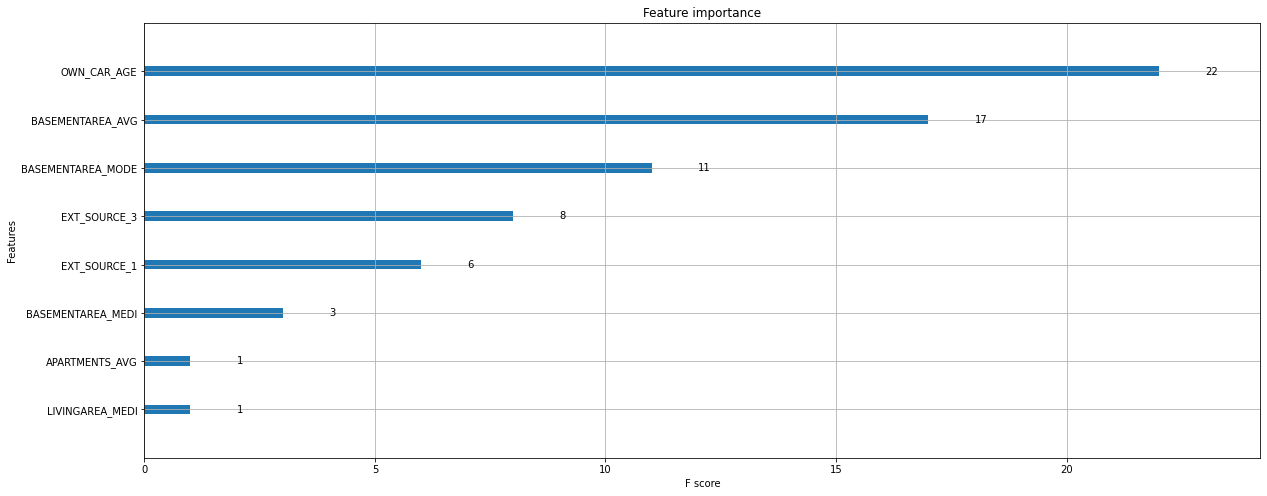

In [25]:
best_params = {'objective':'reg:logistic',
                       'colsample_bytree': 0.7, 
                       'gamma': 0.1, 
                       'learning_rate': 0.3, 
                       'max_depth': 3, 
                       'min_child_weight': 3, 
                       'n_estimators': 50,
                       'silent':1
                      }

homecredit_model = xgb.train(params=best_params, dtrain=homecredit_dmatrix, num_boost_round=10)

ax = xgb.plot_importance(homecredit_model)
ax.figure.set_size_inches(20,8)
plt.show()

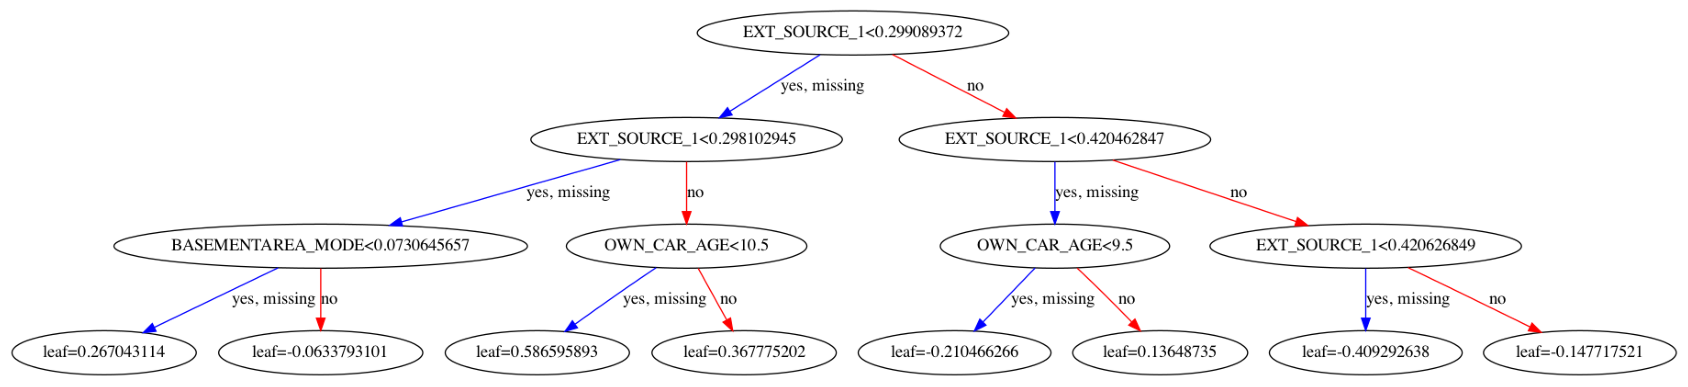

In [26]:
ax1 = xgb.plot_tree(homecredit_model, num_trees=5)
ax1.figure.set_size_inches(30,30)
plt.show()